<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase2(Task2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

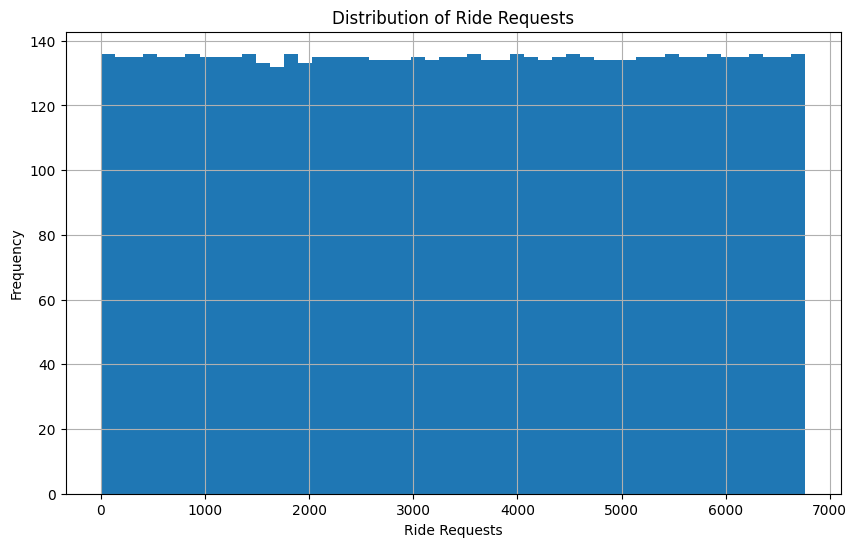

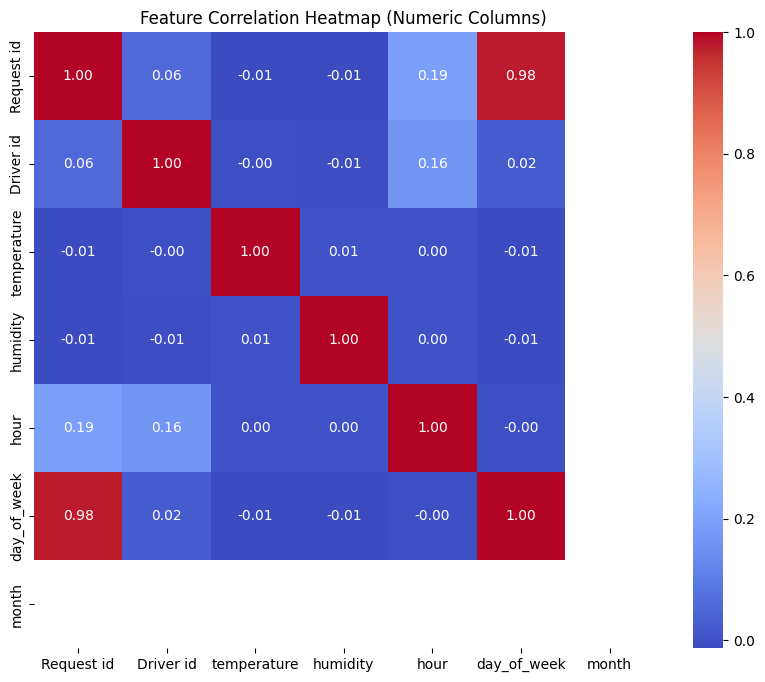



RMSE: 103.46040947620705
Best RMSE: 104.1438629926313



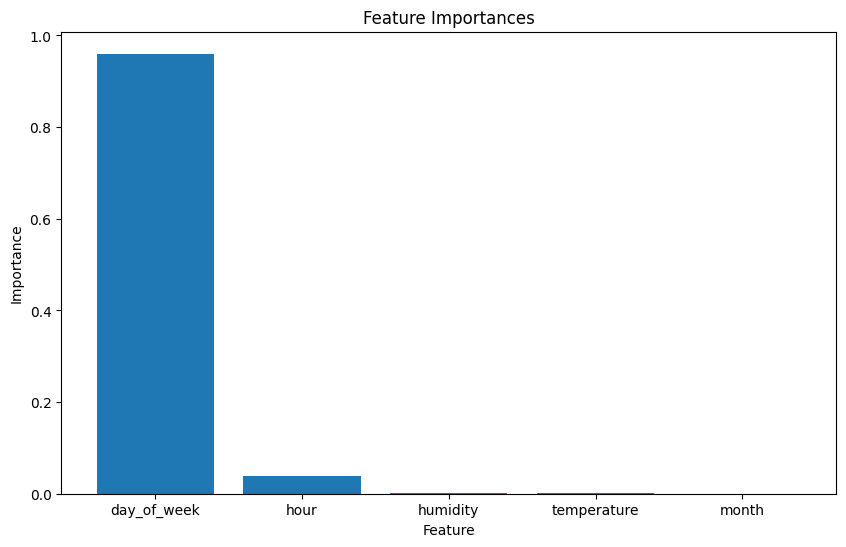

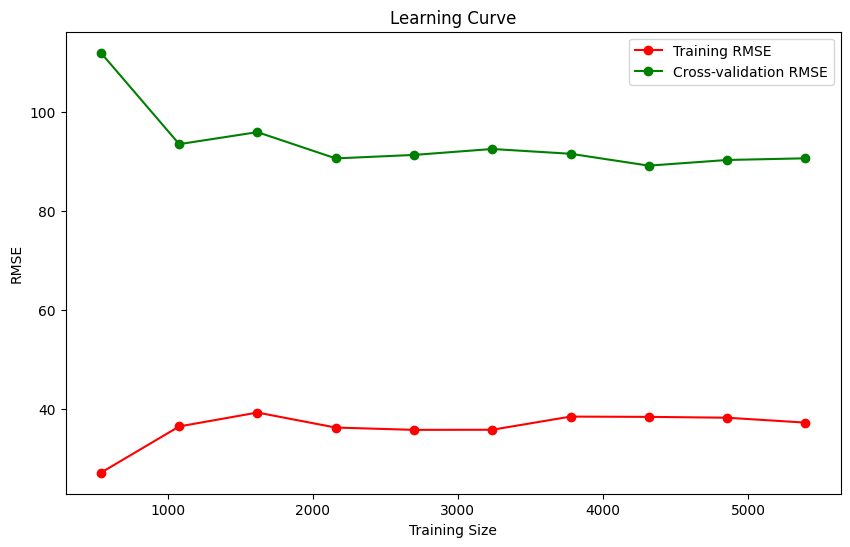




Random Timestamps Predictions: [5428.40316642 6022.28689646  236.86698272  826.45542987 1899.51092555]

Example Prediction: [6125.8563919]


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
# from datetime import datetime, timedelta
# import random

# Step 1: Data Collection
data = pd.read_csv('/content/ride_requests.csv')
# Add temperature and humidity columns if they don't exist
if 'temperature' not in data.columns:
    data['temperature'] = np.random.uniform(20, 35, size=len(data))  # Replace with actual data if available
if 'humidity' not in data.columns:
    data['humidity'] = np.random.uniform(30, 90, size=len(data))  # Replace with actual data if available


# Step 2: Data Preprocessing
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d-%m-%Y %H:%M')
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month

# Handle missing values
data.ffill(inplace=True)

# Step 3: Exploratory Data Analysis
# Visualize the distribution of ride requests
plt.figure(figsize=(10, 6))
data['Request id'].hist(bins=50)
plt.title('Distribution of Ride Requests')
plt.xlabel('Ride Requests')
plt.ylabel('Frequency')
plt.show()
print('\n')

# Correlation heatmap for numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Heatmap to visualize correlations for numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numeric Columns)')
plt.show()
print('\n')

# Step 4: Feature Selection/Engineering
features = ['hour', 'day_of_week', 'month', 'temperature', 'humidity']
X = data[features]
y = data['Request id']

# Step 5: Model Selection and Step 6: Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Step 8: Hyperparameter Tuning (Example with GridSearchCV)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f'Best RMSE: {rmse_best}\n')

# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()
print('\n')

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.sqrt(train_scores_mean), 'o-', color='r', label='Training RMSE')
plt.plot(train_sizes, np.sqrt(test_scores_mean), 'o-', color='g', label='Cross-validation RMSE')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()
print('\n')

# Step 9: Prediction
# Generate random timestamps for prediction
def generate_random_timestamps(start_date, end_date, n):
    start_u = start_date.value//10**9
    end_u = end_date.value//10**9
    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-12-31')
random_timestamps = generate_random_timestamps(start_date, end_date, 5)

# Create a DataFrame for random timestamps and extract features
random_data = pd.DataFrame({'timestamp': random_timestamps})
random_data['hour'] = random_data['timestamp'].dt.hour
random_data['day_of_week'] = random_data['timestamp'].dt.dayofweek
random_data['month'] = random_data['timestamp'].dt.month

# Generate random temperature and humidity values for predictions
random_data['temperature'] = np.random.uniform(20, 35, size=len(random_data))
random_data['humidity'] = np.random.uniform(30, 90, size=len(random_data))

# Make predictions
random_features = random_data[features]
predictions = best_model.predict(random_features)
print('\nRandom Timestamps Predictions:', predictions)

# Step 10: Deployment
# Save the model to a file
joblib.dump(best_model, 'best_model.pkl')

# Example of loading the model and making predictions
loaded_model = joblib.load('best_model.pkl')
example_data = pd.DataFrame({
    'hour': [15],
    'day_of_week': [4],
    'month': [7],
    'temperature': [29],
    'humidity': [50]
})
example_prediction = loaded_model.predict(example_data)
print('\nExample Prediction:', example_prediction)


   Hour  Day_of_Week  Weather_Condition  Ride_Requests
0     6            6                  1             32
1    19            0                  2             42
2    14            1                  0             42
3    10            5                  0             51
4     7            5                  0             46
Mean Squared Error: 25.24
R^2 Score: 0.86


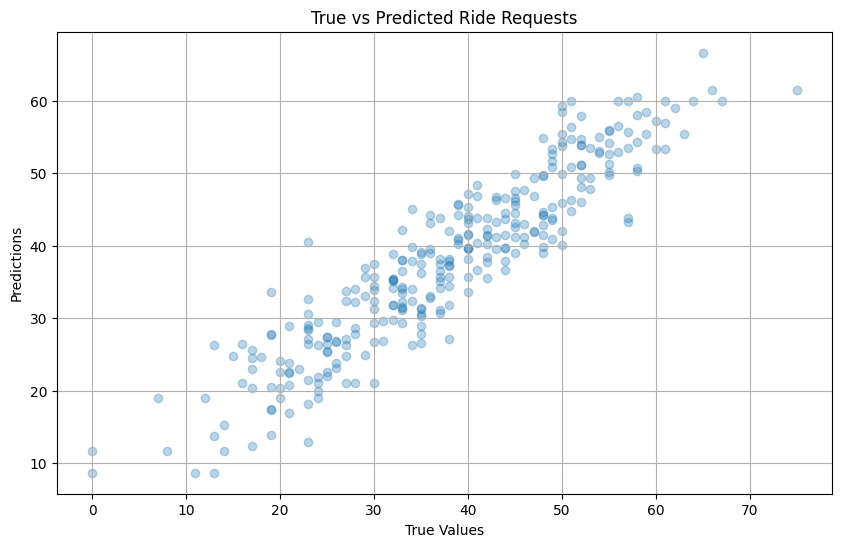

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

# Generate random features
hours = np.random.randint(0, 24, size=n_samples)
days_of_week = np.random.randint(0, 7, size=n_samples)  # 0 = Monday, 6 = Sunday
weather_conditions = np.random.randint(0, 3, size=n_samples)  # 0 = Clear, 1 = Rainy, 2 = Snowy

# Generate ride requests with some noise
ride_requests = (20 + hours * 1.5 + days_of_week * 2 + weather_conditions * -5 +
                 np.random.normal(0, 5, n_samples)).astype(int)

# Create a DataFrame
df = pd.DataFrame({
    'Hour': hours,
    'Day_of_Week': days_of_week,
    'Weather_Condition': weather_conditions,
    'Ride_Requests': ride_requests
})

# Display first few rows of the dataframe
print(df.head())

# Define features and target variable
X = df[['Hour', 'Day_of_Week', 'Weather_Condition']]
y = df['Ride_Requests']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Ride Requests')
plt.grid(True)
plt.show()
